In [ ]:
# unzip file
# !unzip '/content/drive/My Drive/Alfred_Sisley.zip'

In [ ]:
# Iterate through folder in images
# import cv2
# import glob
# from google.colab import files
# from io import BytesIO
# from PIL import Image
# import matplotlib.pyplot as plt

# # path = '/content/drive/My Drive/Alfred_Sisley'
# # for file in glob.glob(path):
# #   print(file)
# #   plt.imshow(im)
# #   plt.show()

# # get the names of the painting files for each artist
# import glob
# images = glob.glob('/content/Pablo_Picasso' + '/*.jpg')
# image_name = [values.split('/') for values in images]
# images_name = [name[3] for name in image_name]
# images_name

['Andrei_Rublev_62.jpg',
 'Andrei_Rublev_73.jpg',
 'Andrei_Rublev_71.jpg',
 'Andrei_Rublev_52.jpg',
 'Andrei_Rublev_60.jpg',
 'Andrei_Rublev_51.jpg',
 'Andrei_Rublev_68.jpg',
 'Andrei_Rublev_98.jpg',
 'Andrei_Rublev_9.jpg',
 'Andrei_Rublev_47.jpg',
 'Andrei_Rublev_53.jpg',
 'Andrei_Rublev_97.jpg',
 'Andrei_Rublev_55.jpg',
 'Andrei_Rublev_39.jpg',
 'Andrei_Rublev_76.jpg',
 'Andrei_Rublev_95.jpg',
 'Andrei_Rublev_2.jpg',
 'Andrei_Rublev_29.jpg',
 'Andrei_Rublev_43.jpg',
 'Andrei_Rublev_35.jpg',
 'Andrei_Rublev_67.jpg',
 'Andrei_Rublev_96.jpg',
 'Andrei_Rublev_94.jpg',
 'Andrei_Rublev_31.jpg',
 'Andrei_Rublev_57.jpg',
 'Andrei_Rublev_89.jpg',
 'Andrei_Rublev_18.jpg',
 'Andrei_Rublev_21.jpg',
 'Andrei_Rublev_54.jpg',
 'Andrei_Rublev_45.jpg',
 'Andrei_Rublev_34.jpg',
 'Andrei_Rublev_48.jpg',
 'Andrei_Rublev_10.jpg',
 'Andrei_Rublev_11.jpg',
 'Andrei_Rublev_3.jpg',
 'Andrei_Rublev_42.jpg',
 'Andrei_Rublev_91.jpg',
 'Andrei_Rublev_64.jpg',
 'Andrei_Rublev_37.jpg',
 'Andrei_Rublev_56.jpg',
 'A

In [ ]:
# connect to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# downloading a data from a file into Python
import pandas as pd
import numpy as np

In [ ]:
# Change name depending on file
!unzip '/content/drive/My Drive/Claude_Monet.zip'

Archive:  /content/drive/My Drive/Claude_Monet.zip
   creating: Claude_Monet/
  inflating: __MACOSX/._Claude_Monet  
  inflating: Claude_Monet/Claude_Monet_42.jpg  
  inflating: __MACOSX/Claude_Monet/._Claude_Monet_42.jpg  
  inflating: Claude_Monet/Claude_Monet_56.jpg  
  inflating: __MACOSX/Claude_Monet/._Claude_Monet_56.jpg  
  inflating: Claude_Monet/Claude_Monet_7.jpg  
  inflating: __MACOSX/Claude_Monet/._Claude_Monet_7.jpg  
  inflating: Claude_Monet/Claude_Monet_6.jpg  
  inflating: __MACOSX/Claude_Monet/._Claude_Monet_6.jpg  
  inflating: Claude_Monet/Claude_Monet_57.jpg  
  inflating: __MACOSX/Claude_Monet/._Claude_Monet_57.jpg  
  inflating: Claude_Monet/Claude_Monet_43.jpg  
  inflating: __MACOSX/Claude_Monet/._Claude_Monet_43.jpg  
  inflating: Claude_Monet/Claude_Monet_69.jpg  
  inflating: __MACOSX/Claude_Monet/._Claude_Monet_69.jpg  
  inflating: Claude_Monet/Claude_Monet_55.jpg  
  inflating: __MACOSX/Claude_Monet/._Claude_Monet_55.jpg  
  inflating: Claude_Monet/Claud

In [ ]:
# Compiled to one function to iterate through the images
import glob
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import csv

%matplotlib inline

# Color identification
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# returns final dictionary with file info
def makeCSVColor(artist_name, folder_path):
  # get the names of the painting files for each artist
  images = glob.glob(folder_path + '/*.jpg')
  image_name = [values.split('/') for values in images]
  images_name = [name[3] for name in image_name]
  images_name # all the names of the paintings

  final_rows = []

  # go through the process for each image
  for file_name in images_name:
    # print(file_name)
    # initial image and color processing 
    image = cv2.imread('Claude_Monet/' + file_name)
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    clf = KMeans(n_clusters = 3)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)

    center_colors = clf.cluster_centers_

    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    top_colors = []
    color_values = []
    
    # if (True):
    if (True):
        # plt.figure(figsize = (8, 6))
        # plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        # print(list(counts.values()))
        top_colors.append(hex_colors)
        color_values.append(list(counts.values()))

    # print(top_colors)
    # print(color_values)
    final_rows.append({'artist': artist_name, 'painting_id': file_name, 'top_color_1': top_colors[0][0], 'top_color_2': top_colors[0][1], 'top_color_3': top_colors[0][2], 'color_value_1': color_values[0][0], 'color_value_2': color_values[0][1], 'color_value_3': color_values[0][2]})
    # print(final_rows)


  return final_rows
  

In [ ]:
# write to CSV
import csv
artist_folder = 'Claude_Monet'
artist_rows = makeCSVColor(artist_folder, '/content/' + artist_folder)
print(artist_rows)
csv_name = artist_folder + '_Colors.csv'
with open(csv_name, mode='w') as csv_file:
    fieldnames = ['artist', 'painting_id', 'top_color_1', 'top_color_2', 'top_color_3', 'color_value_1', 'color_value_2', 'color_value_3']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for row in artist_rows: 
      writer.writerow(row)


[{'artist': 'Claude_Monet', 'painting_id': 'Claude_Monet_44.jpg', 'top_color_1': '#3c3c39', 'top_color_2': '#bec4c2', 'top_color_3': '#626d70', 'color_value_1': 200013, 'color_value_2': 364998, 'color_value_3': 281837}, {'artist': 'Claude_Monet', 'painting_id': 'Claude_Monet_8.jpg', 'top_color_1': '#cad2d3', 'top_color_2': '#798c82', 'top_color_3': '#59624e', 'color_value_1': 538686, 'color_value_2': 743806, 'color_value_3': 495508}, {'artist': 'Claude_Monet', 'painting_id': 'Claude_Monet_60.jpg', 'top_color_1': '#c1a69c', 'top_color_2': '#3a4a2b', 'top_color_3': '#897d68', 'color_value_1': 129053, 'color_value_2': 126432, 'color_value_3': 370179}, {'artist': 'Claude_Monet', 'painting_id': 'Claude_Monet_64.jpg', 'top_color_1': '#34493c', 'top_color_2': '#579ca8', 'top_color_3': '#d4c7ba', 'color_value_1': 248001, 'color_value_2': 294188, 'color_value_3': 300563}, {'artist': 'Claude_Monet', 'painting_id': 'Claude_Monet_6.jpg', 'top_color_1': '#3c3e27', 'top_color_2': '#c0c5b0', 'top_col

In [ ]:
# count the age differences
artist_age = pd.read_csv('artists.csv')
age_number = artist_age['years'].tolist()
age_number_separated = [txt.split(' ') for txt in age_number]
age_number_separated 
final_ages = [(int(value[2]) - int(value[0])) for value in age_number_separated]
final_ages

artist_age['time_span'] = final_ages
artist_age

beginning = [int(value[0]) for value in age_number_separated]
beginning
ending = [(int(value[2])) for value in age_number_separated]
artist_age['beginning_year'] = beginning
artist_age['ending_year'] = ending
artist_age

# sort by artist with most paintings
artist_paintings = artist_age.sort_values(by=['paintings'], ascending=False)
artist_top = artist_paintings.head(n=30);
artist_timeline = artist_top.sort_values(by=['beginning_year'], ascending=True)
artist_timeline

,id,name,years,genre,nationality,bio,wikipedia,paintings,time_span,beginning_year,ending_year
23,23,Giotto di Bondone,1266 - 1337,Proto Renaissance,Italian,Giotto di Bondone (Italian pronunciation: [ˈdʒ...,http://en.wikipedia.org/wiki/Giotto_di_Bondone,119,71,1266,1337
24,24,Sandro Botticelli,1445 - 1510,Early Renaissance,Italian,"Alessandro (c. 1445 – May 17, 1510), known as ...",http://en.wikipedia.org/wiki/Sandro_Botticelli,164,65,1445,1510
10,10,Hieronymus Bosch,1450 - 1516,Northern Renaissance,Dutch,Hieronymus Bosch ( (listen); Dutch: [ɦijeːˈroː...,http://en.wikipedia.org/wiki/Hieronymus_Bosch,137,66,1450,1516
26,26,Leonardo da Vinci,1452 - 1519,High Renaissance,Italian,Leonardo di ser Piero da Vinci (Italian: [leoˈ...,http://en.wikipedia.org/wiki/Leonardo_da_Vinci,143,67,1452,1519
19,19,Albrecht Dürer,1471 - 1528,Northern Renaissance,German,Albrecht Dürer (; German: [ˈʔalbʁɛçt ˈdyːʁɐ]; ...,http://en.wikipedia.org/wiki/Albrecht_Dürer,328,57,1471,1528
47,47,Raphael,1483 – 1520,High Renaissance,Italian,Raffaello Sanzio da Urbino (Italian: [raffaˈɛl...,https://en.wikipedia.org/wiki/Raphael,109,37,1483,1520
32,32,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,Tiziano Vecelli or Tiziano Vecellio (pronounce...,http://en.wikipedia.org/wiki/Titian,255,88,1488,1576
21,21,Pieter Bruegel,1525 - 1569,Northern Renaissance,Flemish,Pieter Bruegel (also Brueghel) the Elder (Dutc...,http://en.wikipedia.org/wiki/Pieter_Bruegel_th...,134,44,1525,1569
14,14,Peter Paul Rubens,1577 - 1640,Baroque,Flemish,Sir Peter Paul Rubens (; Dutch: [ˈrybə(n)s]; 2...,http://en.wikipedia.org/wiki/Peter_Paul_Rubens,141,63,1577,1640
27,27,Diego Velazquez,1599 - 1660,Baroque,Spanish,Diego Rodríguez de Silva y Velázquez (Spanish:...,http://en.wikipedia.org/wiki/Diego_Velázquez,128,61,1599,1660


In [ ]:
# sorted by amount of paintings
artist_paintings = artist_age.sort_values(by=['paintings'], ascending=False)
artist_paintings

,id,name,years,genre,nationality,bio,wikipedia,paintings,time_span
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877,37
30,30,Edgar Degas,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702,83
13,13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439,92
15,15,Pierre-Auguste Renoir,1841 - 1919,Impressionism,French,"Pierre-Auguste Renoir, commonly known as Augus...",http://en.wikipedia.org/wiki/Pierre-Auguste_Re...,336,78
19,19,Albrecht Dürer,1471 - 1528,Northern Renaissance,German,Albrecht Dürer (; German: [ˈʔalbʁɛçt ˈdyːʁɐ]; ...,http://en.wikipedia.org/wiki/Albrecht_Dürer,328,57
46,46,Paul Gauguin,1848 – 1903,"Symbolism,Post-Impressionism",French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311,55
16,16,Francisco Goya,1746 - 1828,Romanticism,Spanish,Francisco José de Goya y Lucientes (; Spanish:...,http://en.wikipedia.org/wiki/Francisco_Goya,291,82
31,31,Rembrandt,1606 - 1669,Baroque,Dutch,Rembrandt Harmenszoon van Rijn (; Dutch: [ˈrɛm...,http://en.wikipedia.org/wiki/Rembrandt,262,63
20,20,Alfred Sisley,1839 - 1899,Impressionism,"French,British",Alfred Sisley (; French: [sislɛ]; 30 October 1...,http://en.wikipedia.org/wiki/Alfred_Sisley,259,60
32,32,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,Tiziano Vecelli or Tiziano Vecellio (pronounce...,http://en.wikipedia.org/wiki/Titian,255,88


In [ ]:
top_artist = artist_paintings.head(n=30)
top_artist

,id,name,years,genre,nationality,bio,wikipedia,paintings,time_span
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877,37
30,30,Edgar Degas,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702,83
13,13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439,92
15,15,Pierre-Auguste Renoir,1841 - 1919,Impressionism,French,"Pierre-Auguste Renoir, commonly known as Augus...",http://en.wikipedia.org/wiki/Pierre-Auguste_Re...,336,78
19,19,Albrecht Dürer,1471 - 1528,Northern Renaissance,German,Albrecht Dürer (; German: [ˈʔalbʁɛçt ˈdyːʁɐ]; ...,http://en.wikipedia.org/wiki/Albrecht_Dürer,328,57
46,46,Paul Gauguin,1848 – 1903,"Symbolism,Post-Impressionism",French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311,55
16,16,Francisco Goya,1746 - 1828,Romanticism,Spanish,Francisco José de Goya y Lucientes (; Spanish:...,http://en.wikipedia.org/wiki/Francisco_Goya,291,82
31,31,Rembrandt,1606 - 1669,Baroque,Dutch,Rembrandt Harmenszoon van Rijn (; Dutch: [ˈrɛm...,http://en.wikipedia.org/wiki/Rembrandt,262,63
20,20,Alfred Sisley,1839 - 1899,Impressionism,"French,British",Alfred Sisley (; French: [sislɛ]; 30 October 1...,http://en.wikipedia.org/wiki/Alfred_Sisley,259,60
32,32,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,Tiziano Vecelli or Tiziano Vecellio (pronounce...,http://en.wikipedia.org/wiki/Titian,255,88


In [ ]:
# sorted by amount of paintings
# artist_time_span = artist_age.sort_values(by=['time_span'], ascending=False)
# artist_time_span

,id,name,years,genre,nationality,bio,wikipedia,paintings,time_span
22,22,Marc Chagall,1887 - 1985,Primitivism,"French,Jewish,Belarusian",Marc Zakharovich Chagall ( shə-GAHL; born Mois...,http://en.wikipedia.org/wiki/Marc_Chagall,239,98
13,13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439,92
44,44,Joan Miro,1893 – 1983,Surrealism,Spanish,Joan Miró i Ferrà (; Catalan: [ʒuˈam miˈɾo j f...,https://en.wikipedia.org/wiki/Joan_Miró,102,90
48,48,Michelangelo,1475 – 1564,High Renaissance,Italian,Michelangelo di Lodovico Buonarroti Simoni or ...,https://en.wikipedia.org/wiki/Michelangelo,49,89
32,32,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,Tiziano Vecelli or Tiziano Vecellio (pronounce...,http://en.wikipedia.org/wiki/Titian,255,88
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73,86
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139,85
28,28,Henri Matisse,1869 - 1954,"Impressionism,Post-Impressionism",French,Henri Émile Benoît Matisse (French: [ɑ̃ʁi emil...,http://en.wikipedia.org/wiki/Henri_Matisse,186,85
30,30,Edgar Degas,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702,83
16,16,Francisco Goya,1746 - 1828,Romanticism,Spanish,Francisco José de Goya y Lucientes (; Spanish:...,http://en.wikipedia.org/wiki/Francisco_Goya,291,82


In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2
# from collections import Counter
# from skimage.color import rgb2lab, deltaE_cie76
# import os

# %matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (1280, 1015, 3)


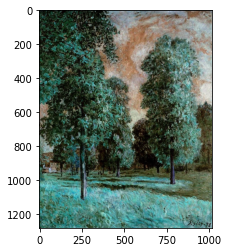

In [ ]:
# image = cv2.imread('Alfred_Sisley/Alfred_Sisley_76.jpg')
# print("The type of this input is {}".format(type(image)))
# print("Shape: {}".format(image.shape))
# plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (700, 538, 3)

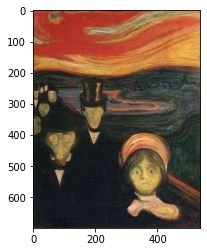

In [ ]:
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)

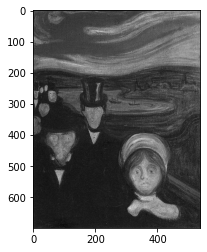

In [ ]:
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_image, cmap='gray')

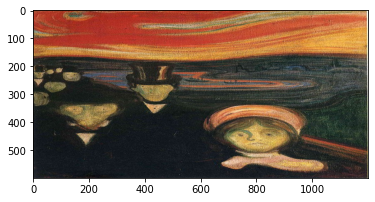

In [ ]:
# resized_image = cv2.resize(image, (1200, 600))
# plt.imshow(resized_image)

In [ ]:
# Color identification


# def RGB2HEX(color):
#     return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
  
# def get_image(image_path):
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     return image

In [ ]:
# modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
# modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [ ]:
# clf = KMeans(n_clusters = 3)
# labels = clf.fit_predict(modified_image)

['#242825', '#ce965a', '#9a5036']


[['#242825', '#ce965a', '#9a5036']]

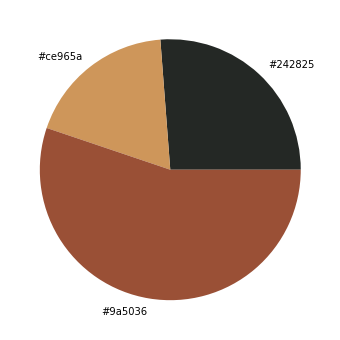

In [ ]:
# counts = Counter(labels)

# center_colors = clf.cluster_centers_
# # We get ordered colors by iterating through the keys
# ordered_colors = [center_colors[i] for i in counts.keys()]
# hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
# rgb_colors = [ordered_colors[i] for i in counts.keys()]

# top_colors = []


# if (True):
#     plt.figure(figsize = (8, 6))
#     plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
#     print(hex_colors)
#     top_colors.append(hex_colors)

# top_colors

In [ ]:
# write to CSV
# import csv

# with open('artist1.csv', mode='w') as csv_file:
#     fieldnames = ['artist', 'painting_id', 'top_color_1', 'top_color_2', 'top_color_3']
#     writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
#     writer.writeheader()
#     writer.writerow({'artist': 20, 'painting_id': 0, 'top_color_1': '#9a5136','top_color_2': '#242825', 'top_color_3': '#ce965a'})

In [ ]:
# merging csv files
import os
import glob
import pandas as pd

In [ ]:

all_painters = ['Vincent_van_Gogh', 'Edgar_Degas', 'Pablo_Picasso',
                      'Pierre-Auguste_Renoir', 'Paul_Gauguin', 'Rembrandt', 'Alfred_Sisley',
                      'Titian', 'Rene_Magritte','Amedeo_Modigliani', 'Paul_Klee',
                      'Henri_Matisse', 'Mikhail_Vrubel', 'Sandro_Botticelli', 'Salvador_Dali',
                      'Kazimir_Malevich', 'Frida_Kahlo', 'Gustav_Klimt', 'Joan_Miro', 'Camille_Pissarro',
                      'Edouard_Manet', 'Vasiliy_Kandinskiy', 'Piet_Mondrian', 'Claude_Monet', 'Francisco_Goya']
all_csv_files = [(x + "_Colors.csv") for x in all_painters]
# print(all_csv_files)
combined_csv = pd.concat([pd.read_csv(f) for f in all_csv_files])

In [ ]:
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')